In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [ ]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

from utils.data_loader import load_data

data_path = "../dataset/spam.csv"
df = load_data(data_path)

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## General Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Missing Values

Will delete the third to fifth columns due to the csv format

In [10]:
df = df[['v1', 'v2']]

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isna().sum()

v1    0
v2    0
dtype: int64

## Duplicate Data

In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [15]:
df.drop_duplicates()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Analysis Target

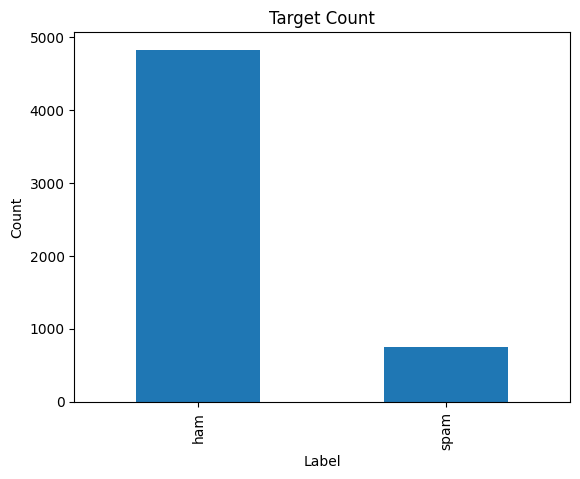

In [16]:
df['v1'].value_counts().plot(kind='bar')

plt.title('Target Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [17]:
pct_count = (df['v1'].value_counts()/len(df))*100
print(pct_count)

v1
ham     86.593683
spam    13.406317
Name: count, dtype: float64


From the graph and percentages above, it can be seen that this dataset is imbalanced with 86% ham

## Text Behaviour Analysis

### Character Length

In [18]:
df['char_count'] = df['v2'].apply(len)

In [19]:
df.groupby('v1')['char_count'].mean()

v1
ham      71.023627
spam    138.866131
Name: char_count, dtype: float64

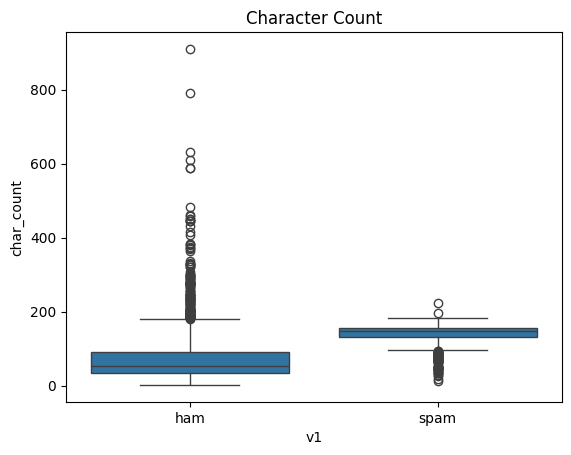

In [20]:
import seaborn as sns

sns.boxplot(x='v1', y='char_count', data=df)
plt.title('Character Count')
plt.show()

### Word Count

In [21]:
df['word_count'] =  df['v2'].apply(lambda x: len(x.split()))

In [22]:
df.groupby('v1')['word_count'].mean()

v1
ham     14.200622
spam    23.851406
Name: word_count, dtype: float64

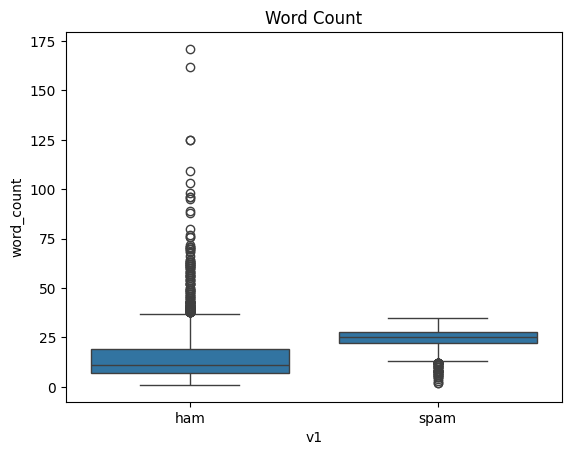

In [23]:
sns.boxplot(x='v1', y='word_count', data=df)
plt.title('Word Count')
plt.show()

### Digit Count

In [24]:
df['digit_count'] = df['v2'].apply(lambda x: sum(c.isdigit() for c in x))

In [25]:
df.groupby('v1')['digit_count'].mean()

v1
ham      0.299275
spam    15.759036
Name: digit_count, dtype: float64

### Summary

In [26]:
spam_mean = df[df['v1']=='spam'][['char_count', 'word_count', 'digit_count']].mean()

ham_mean = df[df['v1']=='ham'][['char_count', 'word_count', 'digit_count']].mean()

comparison = pd.DataFrame({
    'ham': ham_mean,
    'spam': spam_mean,
    'difference': spam_mean-ham_mean
})

comparison

,ham,spam,difference
char_count,71.023627,138.866131,67.842504
word_count,14.200622,23.851406,9.650784
digit_count,0.299275,15.759036,15.459762


Spam messages are longer and contain more numbers than non-spam messages

## Data Cleaning

In [27]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"\d+", " ", text) 
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [28]:
df['v2'] = df['v2'].apply(clean_text)

## Mapping Label

In [29]:
df["v1"] = df["v1"].map({
    "ham": 0,
    "spam": 1
})

## Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

x = df['v2']
y = df['v1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Undersampling

In [31]:
from sklearn.utils import resample

train_df = pd.concat([x_train, y_train], axis=1)

spam = train_df[train_df.v1 == 1]
ham = train_df[train_df.v1 == 0]

ham_downsampled = resample(ham, replace=False, n_samples=len(spam), random_state=42)

train_balanced = pd.concat([spam, ham_downsampled])
train_balanced = train_balanced.sample(frac=1, random_state=42)


x_train = train_balanced['v2']
y_train = train_balanced['v1']

## Modeling

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

In [33]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=10000,
        ngram_range=(1,2),
        min_df=2,
        max_df=0.95,
        sublinear_tf=True
    )),
    ("xgb", XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.2,
        subsample=0.9,
        colsample_bytree=0.7,
        eval_metric="logloss",
        random_state=42
    ))
])

In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "xgb__n_estimators": [200,300,400,500],
    "xgb__max_depth": [4,5,6,7,8],
    "xgb__learning_rate": [0.01,0.05,0.1,0.2],
    "xgb__subsample": [0.7,0.8,0.9],
    "xgb__colsample_bytree": [0.7,0.8,0.9]
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1
)

search.fit(x_train, y_train)

print(search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'xgb__subsample': 0.9, 'xgb__n_estimators': 500, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.05, 'xgb__colsample_bytree': 0.7}


## Training

In [35]:
pipeline.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('xgb', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


## Evaluation

In [36]:
y_pred = pipeline.predict(x_test)
y_prob = pipeline.predict_proba(x_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       966
           1       0.80      0.87      0.84       149

    accuracy                           0.95      1115
   macro avg       0.89      0.92      0.90      1115
weighted avg       0.96      0.95      0.96      1115

ROC-AUC: 0.9738352300359887
Confusion Matrix:
 [[934  32]
 [ 19 130]]


In [37]:
y_train_pred = pipeline.predict(x_train)
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       598
           1       1.00      0.99      0.99       598

    accuracy                           0.99      1196
   macro avg       1.00      0.99      0.99      1196
weighted avg       1.00      0.99      0.99      1196



In [38]:
print("Train distribution:", y_train.value_counts())
print("Test distribution :", y_test.value_counts())


Train distribution: v1
0    598
1    598
Name: count, dtype: int64
Test distribution : v1
0    966
1    149
Name: count, dtype: int64


In [39]:
import joblib

joblib.dump(pipeline, "tf-idf_xgb.pkl")

['tf-idf_xgb.pkl']

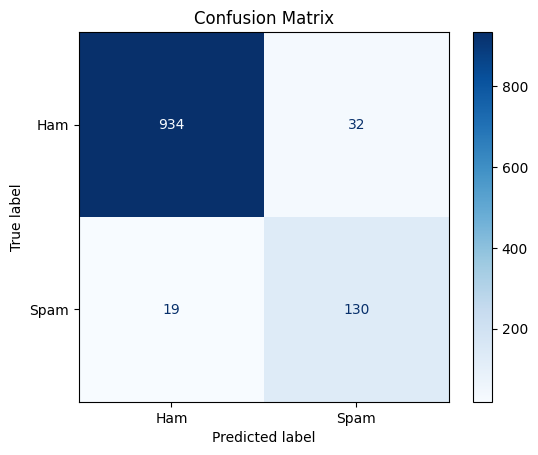

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title("Confusion Matrix")
plt.show()

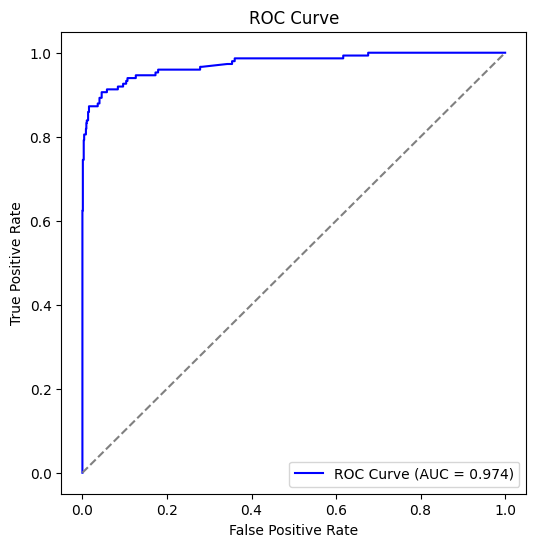

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

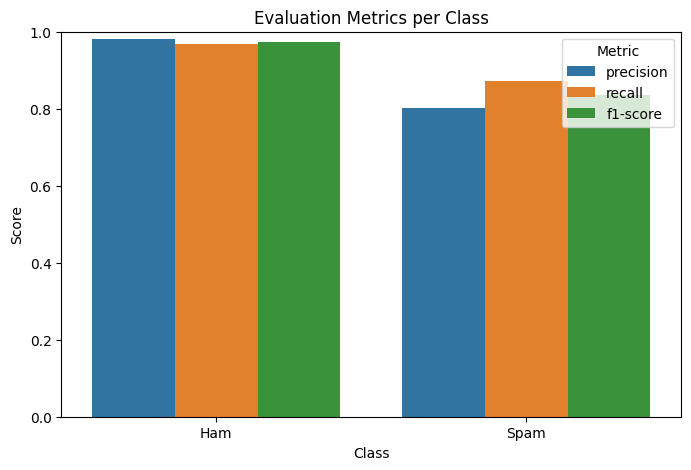

In [47]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], output_dict=True)

df = pd.DataFrame(report).transpose().reset_index()

df = df[df['index'].isin(['Ham', 'Spam'])]

df_melt = df.melt(id_vars='index', value_vars=['precision','recall','f1-score'], 
                  var_name='Metric', value_name='Score')
df_melt.rename(columns={'index':'Class'}, inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(data=df_melt, x='Class', y='Score', hue='Metric')
plt.ylim(0,1)
plt.title('Evaluation Metrics per Class')
plt.show()